# **BIKE SHARING DEMAND PREDICTION**




## <b> Problem Description </b>

###A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis on rent. A rental bike provider wants to come up with a mindful business plan to be able to accelerate its revenue.

### It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. While having excess bikes results in wastage of resource (both with respect to bike maintenance and the land/bike stand required for parking and security), having fewer bikes leads to revenue loss (ranging from a short term loss due to missing out on immediate customers to potential longer term loss due to loss in future customer base).

### The company wants to find out the key driving factors for the demand for shared bikes. These will help them to construct the business strategy to meet the demand levels and meet the customer’s expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Aim of this project is to build a model that predicts the demand for rental bikes using supervised learning algorithms (regression and classification).

###**In Supervised learning**, models are trained using labelled dataset, where the model learns about each type of data. Once the training process is completed, the model is tested on the basis of test data (a subset of the training set), and then it predicts the output.

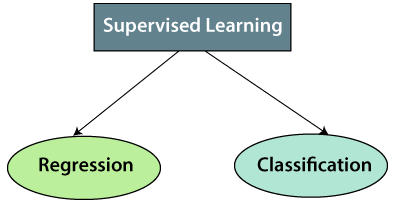

###REGRESSION: Regression algorithms are used if there is a relationship between the input variable and the output variable.

###CLASSIFICATION: Classification algorithms are used when the output variable is categorical, which means there are two classes such as Yes-No, Male-Female, True-false, etc.



# **Loading Dataset and Importing Modules**

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#link to dataset:

#loading dataset
bike_df=pd.read_csv('/content/drive/MyDrive/capstone project 2/SeoulBikeData.csv',encoding ='latin')

# **Observing and Understanding data**

## <b> Data Description </b>

### In this data, we are provided with hourly bike rental data for one year.The dataset contains 14 columns having weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
bike_df.shape

(8760, 14)

In [ ]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#statistical summary of data
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Data Wrangling

## 1.Treating missing and duplicate values

In [ ]:

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking for Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


There are no missing/null or duplicate values in our dataset. Our dataset is clean and can be now used for analysis

##2.Treating the Date column

Since we want to study the demand pattern of bikes we dont really need dates so we will break the dates to extract month and days to get information about the month of demand and days(wheter its weekday or weekend).

In [ ]:
bike_df.head(2)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes

In [ ]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [ ]:
bike_df.head(1)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  year  month     day  
0             Yes  2017     12  Friday

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year" since we are only intrested in wheter the day falls on weedays or weekends.
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

## 3. Changing column name

In [ ]:
#changing column name
bike_df.rename(columns = {"Rented Bike Count":"Rented_bike_count","Solar Radiation (MJ/m2)":"Solar_radiation","Functioning Day":'Functioning_day','Temperature(°C)':'Temperature','Humidity(%)':"Humidity",'Wind speed (m/s)':'Wind_speed', 'Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'Dew_point_temperature','Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'}, inplace = True)

In [ ]:
bike_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
#changing the datatype for weekeday weekend column to categorical type
bike_df['weekdays_weekend']=bike_df['weekdays_weekend'].astype('category')

## 4.Creating duplicate dataset for future use

In [ ]:
bike_df_copy=bike_df.copy()
bike_df1= bike_df.copy()
bike_df2= bike_df.copy()
bike_df3= bike_df.copy()
bike_df4= bike_df.copy()
bike_df5= bike_df.copy()
bike_df6= bike_df.copy()

# **Hypothesis Testing**

**1. Bikes rented in summer season on an average is greater than bikes rented in entire year.**

From the data we know mean count of bikes rented in summer season(u1) is = 1034.07 , standard deviation= 690.24 .
mean count of bikes rented in whole year(u2) is = 704.60 , standard deviation= 644.99 .

**Ho: u1= u2**

**H1: u1>u2**

This is one-tail test(Right -tailed test)

In [ ]:
bike_df.head(1)

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   

   Dew_point_temperature  Solar_radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_day  month weekdays_weekend  
0  No Holiday             Yes     12                0

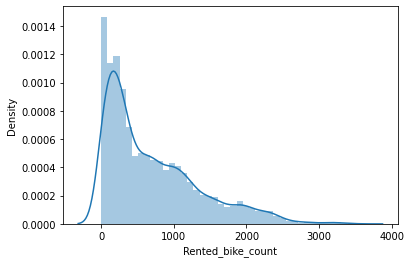

In [ ]:
sns.distplot(bike_df1['Rented_bike_count'])

Since the sample size that we have here is quite big so , the distribution of the input need not be normal.

In [ ]:
bike_df1[bike_df1['Seasons']=='Summer'].shape

(2208, 15)

Total instances for summer season is 2208

In [ ]:
#getting statistical summary for rented bike count for entire year
bike_df1['Rented_bike_count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_bike_count, dtype: float64

In [ ]:
#getting statistical summary for rented bike count for summer season
bike_df[bike_df['Seasons']=='Summer']['Rented_bike_count'].describe()

count    2208.000000
mean     1034.073370
std       690.244759
min         9.000000
25%       526.750000
50%       905.500000
75%      1442.500000
max      3556.000000
Name: Rented_bike_count, dtype: float64

In [ ]:
from numpy.ma.core import sqrt
zscore= (1034.07-704.60)/(sqrt((690.24*690.24)/2208)+((644.99*644.99)/8760))
zscore

5.298713126357554

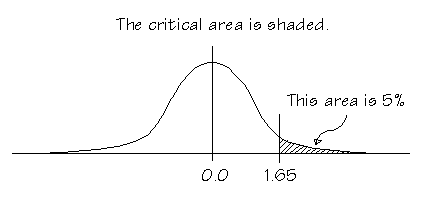

We are carying out a one sided right tail test in 95% confidence interval.
zscore for alpha=0.95 =1.65 ,so for any value greater  than this we will reject our null hypothesis.
Since, zscore=5.29 therefore it is reasonable to conclude that average bikes rented in summer season is greater than avg bikes rented in entire year. 

# **Exploratory Data Analysis**

Doing Exploratory data analysis on data to discover trends, patterns, and to check assumptions with the help of statistical summary and graphical representations. 

*The dependent variable in this dataset is "Rented Bike Count" so we are analysing the dependent variable wrt to different independent variables.

In [ ]:
bike_df.head()

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_day  month weekdays_weekend  
0  No Holiday             Yes     12                0  
1  No Holiday             Yes     12                0  
2  No Holiday             Yes     12                0  
3  No Holiday             Yes     12                0  
4  No Holiday             Yes     12                0

In [ ]:
bike_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

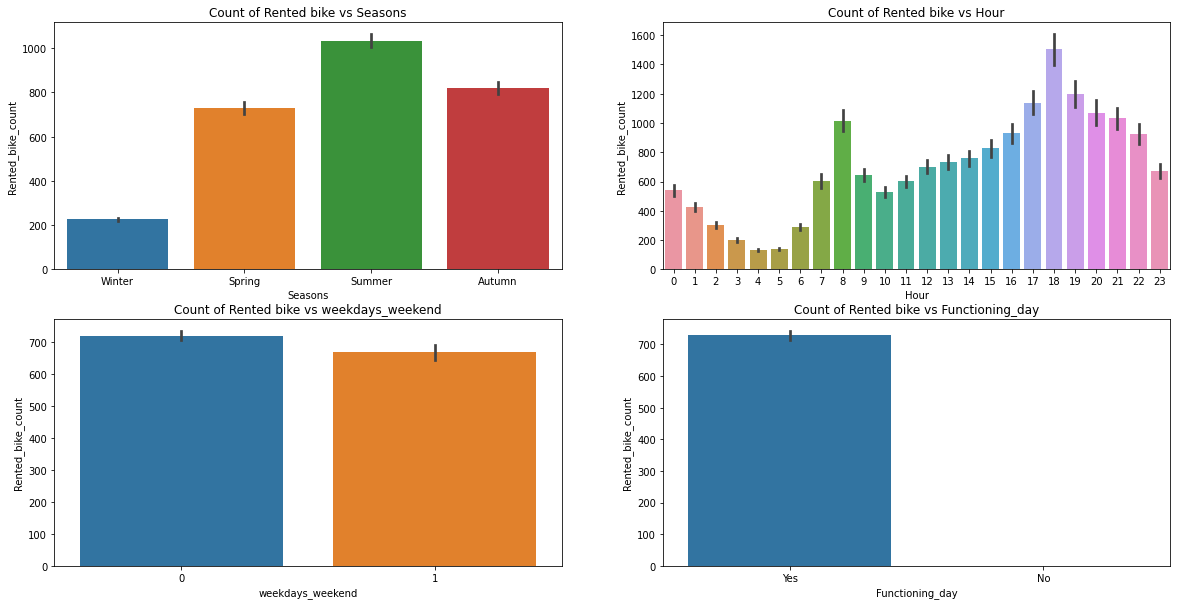

In [ ]:
list= ['Seasons','Hour','weekdays_weekend','Functioning_day']
plt.figure(figsize= (20,10))

for index,i in enumerate(list):
  plt.subplot(2,2,index+1)
  sns.barplot(data=bike_df,x= i,y='Rented_bike_count')
  plt.title(f"Count of Rented bike vs {i}")
  

**1. There is very less or no demand of bikes on non-functioning days as compared with functioning days.**

**2. The demand for rented bikes is highest in the middle of the year or summer season , moderately high in spring and autumn seasons and lowest in winters.**

**3. There is no notable difference in total bike demand on weekdays(blue) and weekends(orange).**

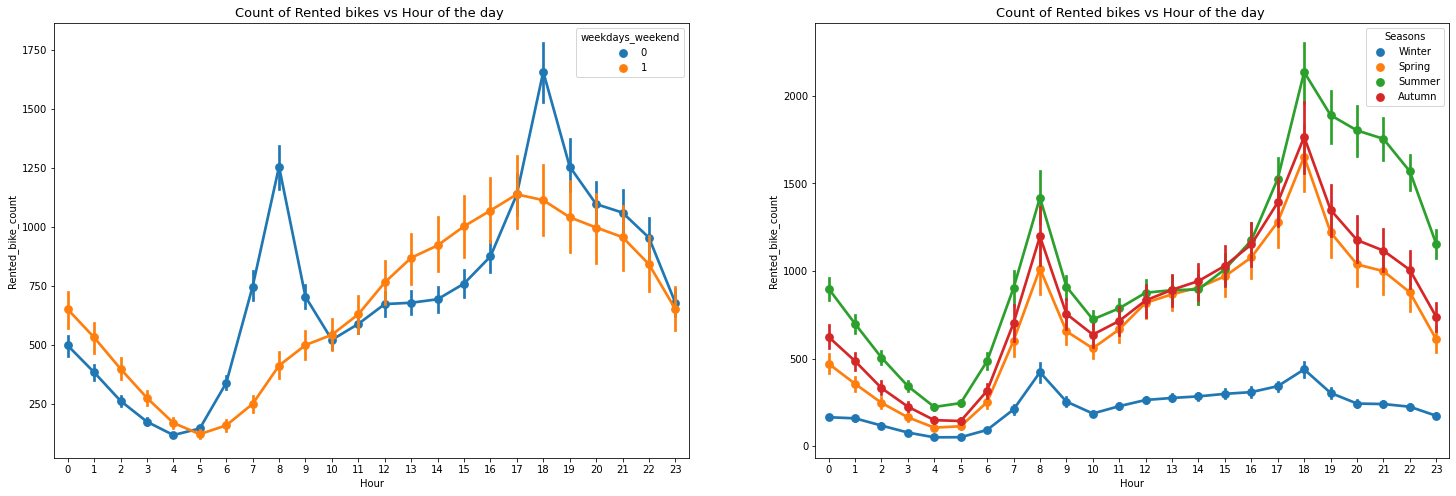

In [ ]:
fig,ax=plt.subplots(figsize=(25,8))
ca=['weekdays_weekend','Seasons']
for index,i in enumerate(ca):
  plt.subplot(1,2,index+1)
  sns.pointplot(data=bike_df,x= 'Hour',y='Rented_bike_count',hue= i)
  plt.title('Count of Rented bikes vs Hour of the day ',fontsize=13,color='black')


**1. Demand of bikes increases between between 6 to 10 in morning on weekdays(blue) is constant uptill 3 and again increases from 4 in evening till 7 in evening and decreases constantly afterwards. On weekends(orange) bike demand constantly increases from 6 in morning and is at peak in evening.**

**2. Demand of bikes  pretty much follow the same pattern during the hours of the day ,but we can clearly the number noticabely increases in summer season as compared to other seasons and winter season sees the lowest demand.**

In [ ]:
df_temporary= bike_df.copy() #to study the effect of temperature on bike demand I have rounded off the temperature values from decimal to integer values
df_temporary['Temperature'] = df_temporary['Temperature'].apply(lambda x: round(x,0)) 

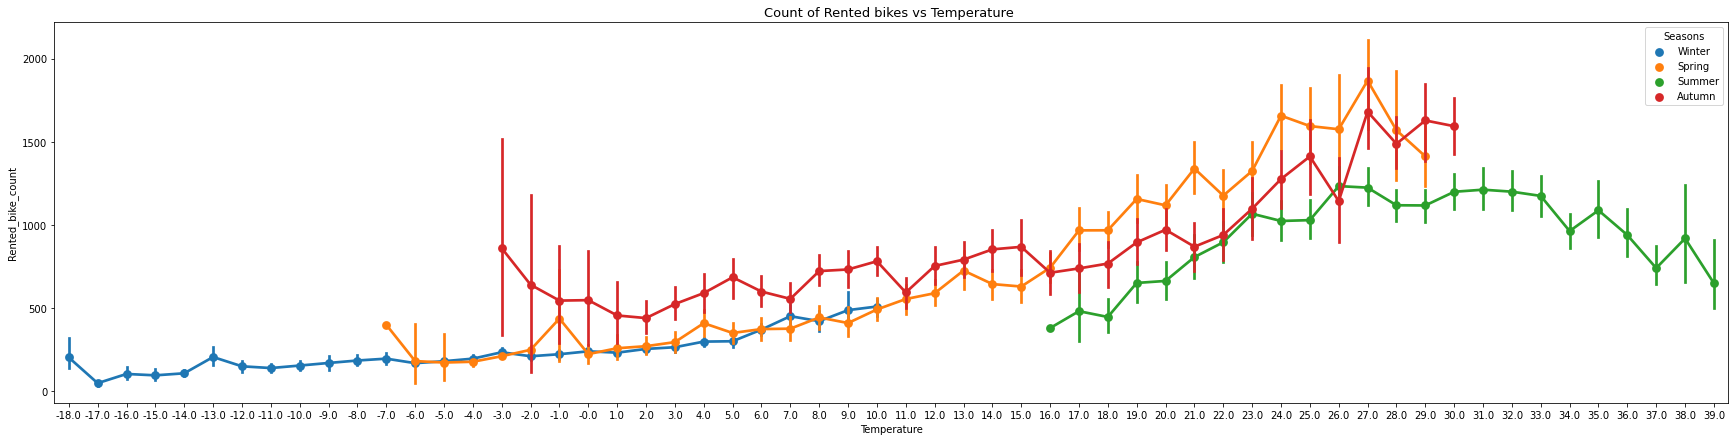

In [ ]:
fig,ax=plt.subplots(figsize=(30,7))
sns.pointplot(data=df_temporary,x= 'Temperature',y='Rented_bike_count',hue= 'Seasons')
plt.title('Count of Rented bikes vs Temperature ',fontsize=13,color='black')
plt.show()

**If we see the count of bikes its very less for low temperatures and increases as the temperature increases but we see a drop after it touches certain temperature which range between (27 -33)degree celsius.**

**Additionally, a little count is seen even for extreme negative temperatures that could possibily be the outliers in the data.**

# **Regression plots to study the relation between independent and dependent variable**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

In [ ]:
bike_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

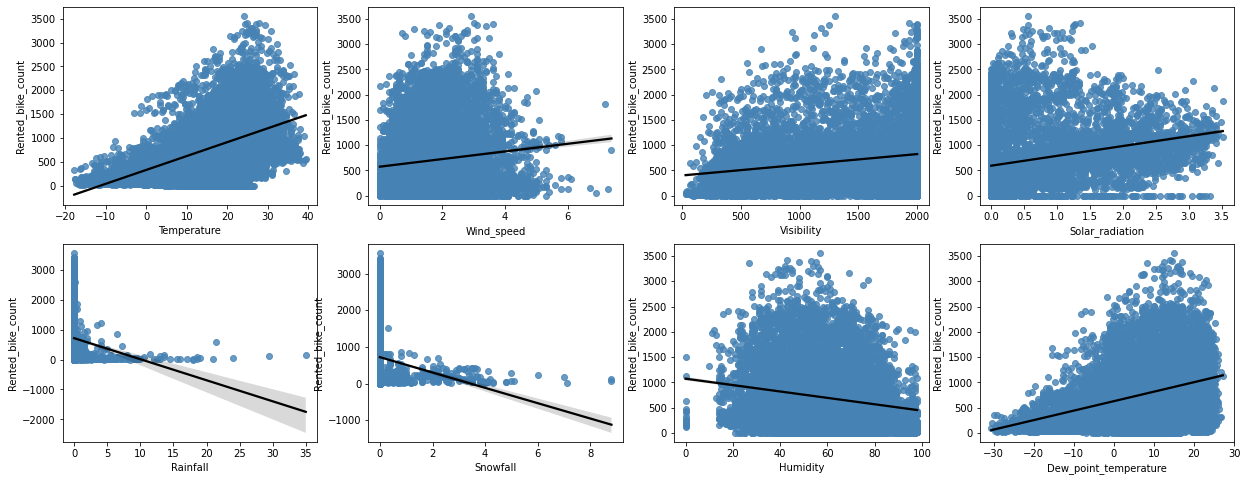

In [ ]:
# analysing regression plots of dependent variables vs independent variables
numerical_variables= ['Temperature','Wind_speed','Visibility', 'Solar_radiation', 'Rainfall','Snowfall','Humidity','Dew_point_temperature']
fig,ax=plt.subplots(figsize=(21,8))
for index,col in enumerate(numerical_variables):
  plt.subplot(2,4,index+1)
  sns.regplot(x=bike_df[col],y=bike_df['Rented_bike_count'],scatter_kws={"color": 'steelblue'}, line_kws={"color": "black"})

**From the above regression plots we see that Temperature, Wind speed,Visibility, Dew point temperature, Solar Radiation are positively related to the target variable.**


**Whereas, Rainfall , Snowfall , Humidity these features are negatively related with the target variable which means the demand for bikes decreases for high values of these features.**

##**Observing Distribution of data for dependent variable**

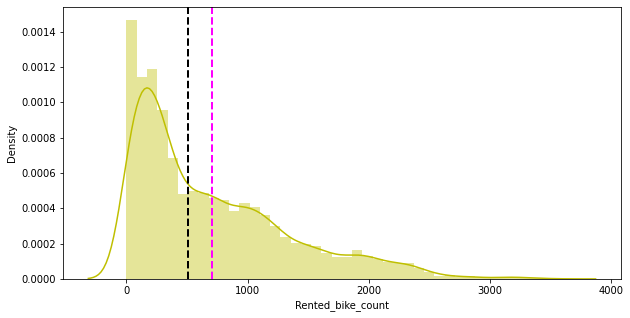

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,5))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_bike_count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

**Rented bike count shows moderately right skewed distribution. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should do logarithmic or square root transformation to make it closer to normal distribution.**

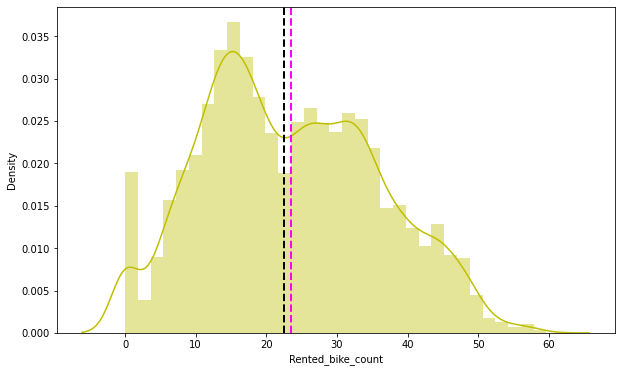

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_bike_count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

##**Observing Distribution of data for independent variables**

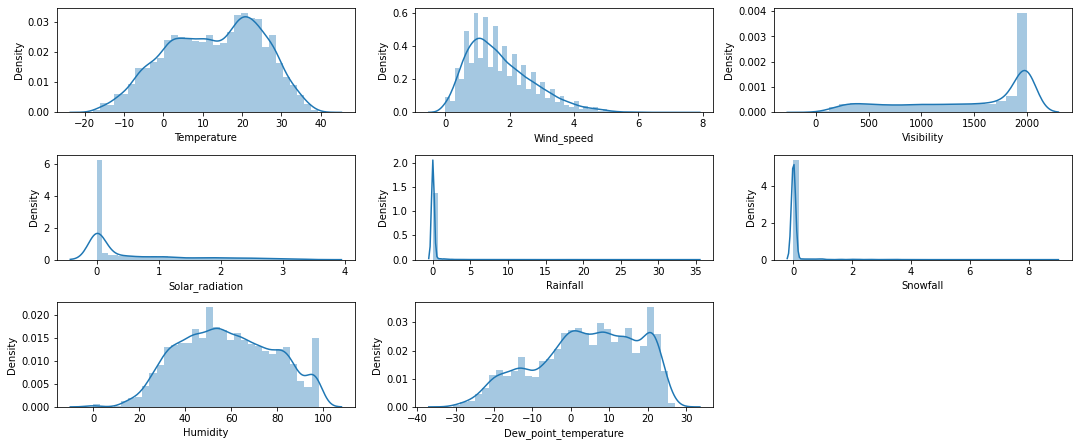

In [ ]:
fig=plt.subplots(figsize=(15, 12))

for i, j in enumerate(numerical_variables):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(bike_df[j])
    plt.tight_layout()

Here we can see that very few variables show normal or close to normal distribution. Most of these independent variables have skewed distribution.

## **Outlier Detection for Numeric Variables**

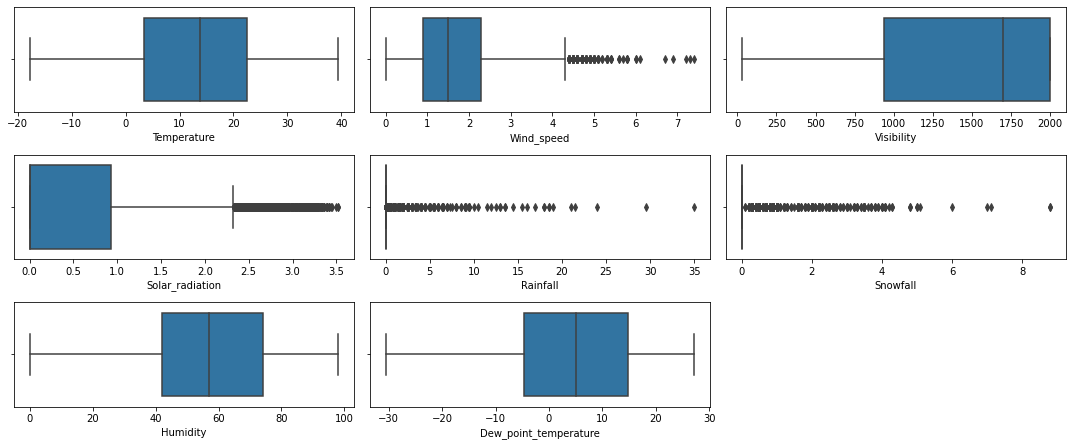

In [ ]:
fig=plt.subplots(figsize=(15, 12))

for i, j in enumerate(numerical_variables):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(bike_df[j])
    plt.tight_layout()

**Rainfall, Snowfall, Windspeed and Solar Radiation these variables contain some outliers. From the distribution plots we have also seen that these variables have extreme skewed distribution, so removing/dropping the outliers from the data might result in significant data loss. Hence, we wil keep all the values.**



##**Checking Correlation between variables**

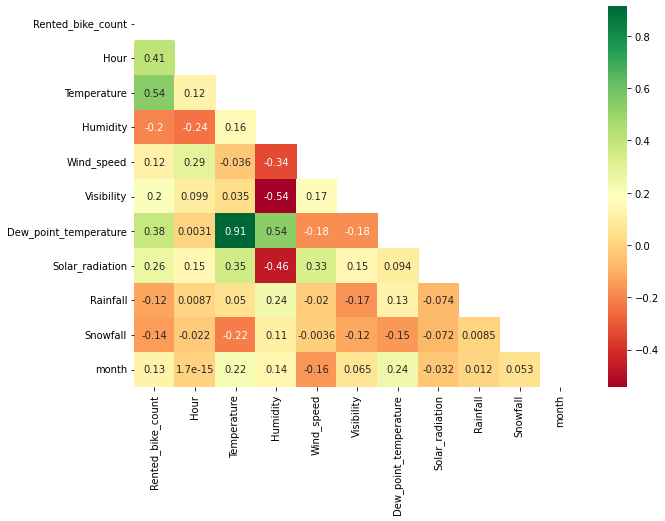

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(10,7))
correlation=bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask,annot=True,cmap='RdYlGn')
plt.show()

**We can observe from the heatmap that the target variable (Demand of bikes) is most positively correlated with:**

* Temperature
* Dew point temperature
* Solar radiation

And most negatively correlated with:
* Humidity
* Rainfall




## **Feature selection**


**1. Temperature and Dew point temperature are also positively correlated i.e 0.91 so to avaoid multicollinearity we will drop Dew point temperature.**

**2. Seasons and months are the representation of same thing so to reduce dimentionality we will drop month column.**



In [ ]:
bike_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
#drop month column
bike_df=bike_df.drop(['month'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_bike_count  8760 non-null   int64   
 1   Hour               8760 non-null   int64   
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_day    8760 non-null   object  
 12  weekdays_weekend   8760 non-null   category
dtypes: category(1), float64(5), int64(4), object(3)
memory usage: 830.1+ KB


# **Feature Engineering**

## **One hot encoding**

One hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical

In [ ]:
#Assigning all catagorical features to a variable
categorical_features=['Seasons', 'Holiday', 'Functioning_day', 'weekdays_weekend']

In [ ]:
#Encoding for Seasons column
bike_df_copy=bike_df.copy()

bike_df_copy['Winter'] = np.where(bike_df_copy['Seasons']=='Winter', 1, 0)
bike_df_copy['Spring'] = np.where(bike_df_copy['Seasons']=='Spring', 1, 0)
bike_df_copy['Summer'] = np.where(bike_df_copy['Seasons']=='Summer', 1, 0)
bike_df_copy['Autumn'] = np.where(bike_df_copy['Seasons']=='Autumn', 1, 0)

bike_df_copy.drop(columns=['Seasons'],axis=1,inplace=True)
#Encoding for Holiday column
bike_df_copy['Holiday'] = np.where(bike_df_copy['Holiday']=='Holiday',1,0)

#Encoding for Functioning day
bike_df_copy['Functioning_day'] = np.where(bike_df_copy['Functioning_day']=='Yes',1,0)

#Encoding for weekdays and weekend
bike_df_copy['weekday'] = np.where(bike_df_copy['weekdays_weekend']==0, 1, 0)
bike_df_copy['weekend'] = np.where(bike_df_copy['weekdays_weekend']==1, 1, 0)

bike_df_copy.drop(columns=['weekdays_weekend'],axis=1,inplace=True)

In [ ]:
bike_df_copy.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_radiation', 'Rainfall', 'Snowfall', 'Holiday',
       'Functioning_day', 'Winter', 'Spring', 'Summer', 'Autumn', 'weekday',
       'weekend'],
      dtype='object')

In [ ]:
bike_df_copy.head(1)

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   

   Solar_radiation  Rainfall  Snowfall  Holiday  Functioning_day  Winter  \
0              0.0       0.0       0.0        0                1       1   

   Spring  Summer  Autumn  weekday  weekend  
0       0       0       0        1        0

In [ ]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_bike_count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Solar_radiation    8760 non-null   float64
 7   Rainfall           8760 non-null   float64
 8   Snowfall           8760 non-null   float64
 9   Holiday            8760 non-null   int64  
 10  Functioning_day    8760 non-null   int64  
 11  Winter             8760 non-null   int64  
 12  Spring             8760 non-null   int64  
 13  Summer             8760 non-null   int64  
 14  Autumn             8760 non-null   int64  
 15  weekday            8760 non-null   int64  
 16  weekend            8760 

#**Model Training**

## **Scaling and splitting the data**

##**Train Test split**

Splitting data into training and testing set.This is done to ensure that we have enough data left to test the model and see the performance on unseen data.

In [ ]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_bike_count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_bike_count'])

In [ ]:
# Splitting the dataset into the Training set and Test set from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 16)
(2190, 16)


**Why do we need scaling?**

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
bike_df_copy.describe()

Rented_bike_count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Solar_radiation     Rainfall     Snowfall      Holiday  \
count  8760.000000      8760.000000  8760.000000  8760.000000  8760.000000   
mean   1436.825799         0.569111     0.148687     0.075068     0.049315   
std     608.298712         0.868746     1.128193     0.436746     0.216537   
min      27.000000         0.000000     0.000000     0.000000     0.000000   
25%     940.000000         0.000000     0.000000     0.000000     0.000000   
50%    1698.000000         0.010000     0.000000     0.000000     0.000000   
75%    2000.000000         0.930000     0.000000     0.000000     0.000000   
max    2000.000000         3.520000    35.000000     8.800000     1.000000   

       Functioning_day       Winter       Spring       Summer       Autumn  \
count      8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          0.966324     0.246575     0.252055     0.252055     0.249315   
std           0.180404     0.431042     0.434217     0.434217     0.432641   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           1.000000     0.000000     0.000000     0.000000     0.000000   
50%           1.000000     0.000000     0.000000     0.000000     0.000000   
75%           1.000000     0.000000     1.000000     1.000000     0.000000   
max           1.000000     1.000000     1.000000     1.000000     1.000000   

           weekday      weekend  
count  8760.000000  8760.000000  
mean      0.715068     0.284932  
std       0.451408     0.451408  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

**Some terminolgies to understand Machine Learning model evaluation parameters:**

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


# **LINEAR REGRESSION**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

In [ ]:
#importing the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#predicting train and and test set values for dependent variable(Y)
y_pred_train_lr=reg.predict(X_train)
y_pred_test_lr=reg.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train_lr))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train_lr)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train_lr)
print("R2 :",r2_lr)

Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )




MSE : 53.52058356493464
RMSE : 7.315776347383416
MAE : 5.632591137510434
R2 : 0.652442706387055
Adjusted R2 : 0.6498836098855332


In [ ]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test_lr)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_lr)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test_lr))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 53.165836123169555
RMSE : 7.291490665369431
MAE : 5.660779254699454
R2 : 0.6634358002882372
Adjusted R2 : 0.6609576469539582


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

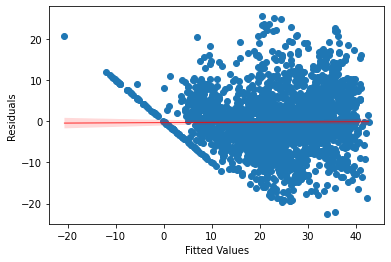

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lr),(y_test)-(y_pred_test_lr))
sns.regplot((y_pred_test_lr),(y_test)-(y_pred_test_lr),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

There seems to be a non-uniform distribution of error terms across all values of the independent variable. This represents heteroscadacity.

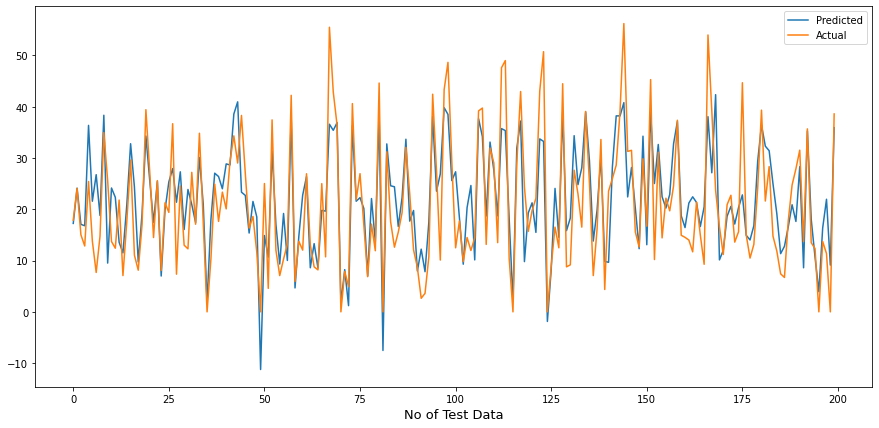

In [ ]:
#Plot the figure
plt.figure(figsize=(15,7))
plt.plot(y_pred_test_lr[:200])
plt.plot(np.array(y_test[:200]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=13,color='black')
plt.show()

#**LASSO REGRESSION** 

In [ ]:
# randomly selecting values of alpha to get best results:
alphas = [1e-06,1e-05,1e-04,0.001,0.01,0.1,1]
print('different alpha values:', alphas)

lasso_score_train = []
lasso_score_test = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train, y_train)
    tr=lasso.score(X_test, y_test)
    tes=lasso.score(X_train, y_train)
    lasso_score_train.append(tr)
    lasso_score_test.append(tes)
print(lasso_score_train)
print(lasso_score_test)

different alpha values: [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
[0.6634356736743217, 0.6634345334097521, 0.6634230356469415, 0.6633043173851808, 0.6615464602946375, 0.6310807736298092, 0.23190526921605736]
[0.6524427063748339, 0.6524427051648458, 0.6524425841659447, 0.6524304199310753, 0.6516273760114961, 0.6233247547477395, 0.2510555143201809]


In [ ]:
#since we got the best lasso score for alpha =1e-06 we will use the same for further calculations
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1e-06, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6634356736743217 0.6524427063748339


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.52058356681658
RMSE : 7.315776347512038
MAE : 5.632591933196518
R2 : 0.6524427063748339
Adjusted R2 : 0.649883609873222


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.16585612391442
RMSE : 7.2914920368820555
MAE : 5.660780821247547
R2 : 0.6634356736743217
Adjusted R2 : 0.6609575194077728


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

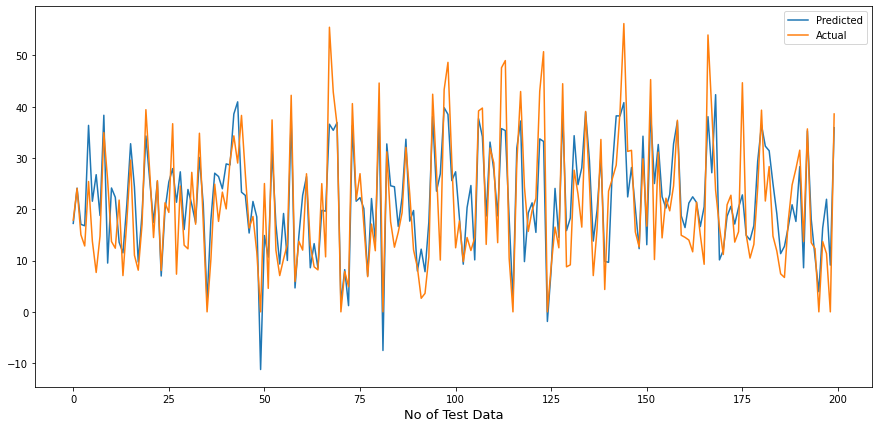

In [ ]:
#Plot the figure
plt.figure(figsize=(15,7))
plt.plot(np.array(y_pred_test_lasso[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=13,color='black')
plt.show()

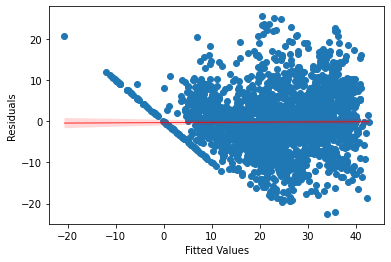

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))
sns.regplot((y_pred_test_lasso),(y_test)-(y_pred_test_lasso),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# **RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=1e-06)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=1e-06)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.6524427063870546

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test_std.shape[0]-1)/(X_test_std.shape[0]-X_test_std.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test_std.shape[0]-1)/(X_test_std.shape[0]-X_test_std.shape[1]-1)) )


MSE : 53.520583564934704
RMSE : 7.31577634738342
MAE : 5.632591145216735
R2 : 0.6524427063870546
Adjusted R2 : 0.6498836098855327


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.16583628061004
RMSE : 7.291490676165611
MAE : 5.6607792681778815
R2 : 0.6634357992915665
Adjusted R2 : 0.6609576459499489


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

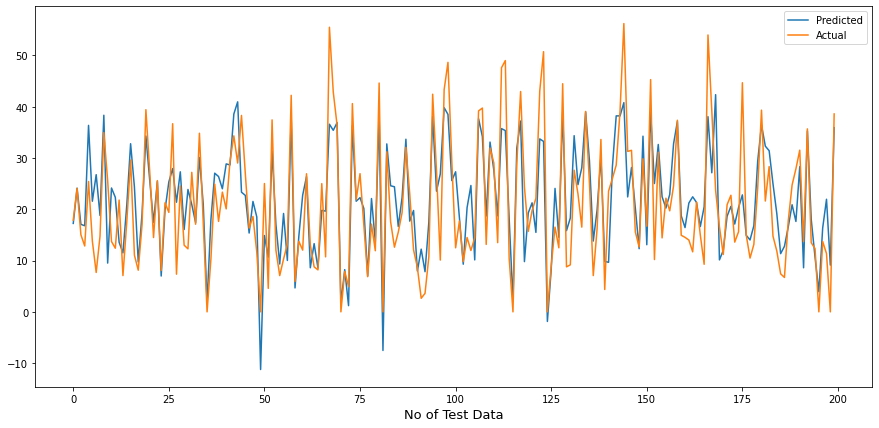

In [ ]:
#Plot the figure
plt.figure(figsize=(15,7))
plt.plot((y_pred_test_ridge[:200]))
plt.plot((np.array(y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=13,color='black')
plt.show()

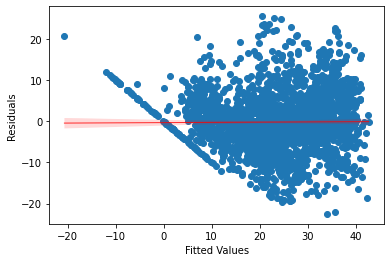

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
sns.regplot((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# **ELASTIC NET REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=1e-06, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1e-06)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.6524427018361935

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.5205842657249
RMSE : 7.315776395279239
MAE : 5.6326169249948785
R2 : 0.6524427018361935
Adjusted R2 : 0.6498836053011632


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 53.16636020067527
RMSE : 7.2915266028915555
MAE : 5.660824323107531
R2 : 0.6634324826365429
Adjusted R2 : 0.6609543048740876


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

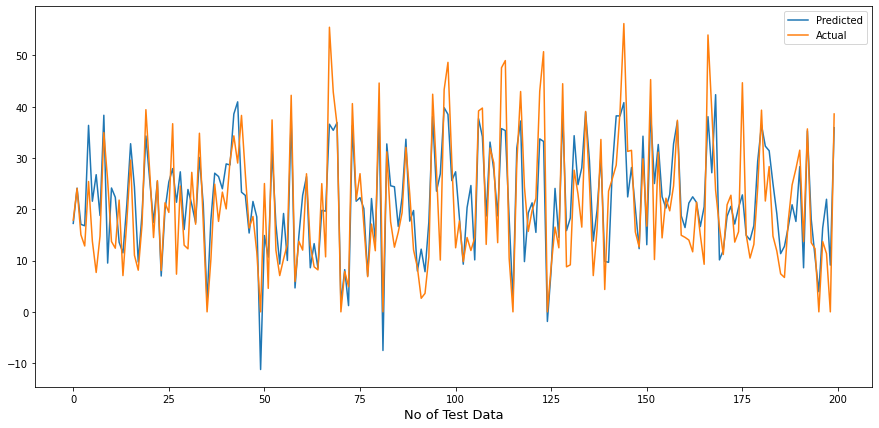

In [ ]:
#Plot the figure
plt.figure(figsize=(15,7))
plt.plot(np.array(y_pred_test_en[:200]))
plt.plot((np.array(y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=13,color='black')
plt.show()

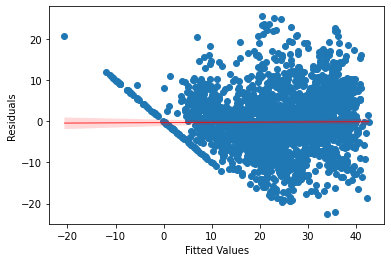

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
sns.regplot((y_pred_test_en),(y_test)-(y_pred_test_en),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# **DECISION TREE**

---



In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
def ji(Model,X_train,y_train,X_test,y_test):
  from sklearn.metrics import mean_squared_error
  print("Model Score:",decision_regressor.score(X_train,y_train))


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8555146891394405
MSE : 22.249391095874593
RMSE : 4.716926021878506
MAE : 3.32513796654673
R2 : 0.8555146891394405
Adjusted R2 : 0.8544508304308491


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 26.69424440539202
RMSE : 5.166647308012423
MAE : 3.600795857860972
R2 : 0.8310131531760936
Adjusted R2 : 0.8297688873918403


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

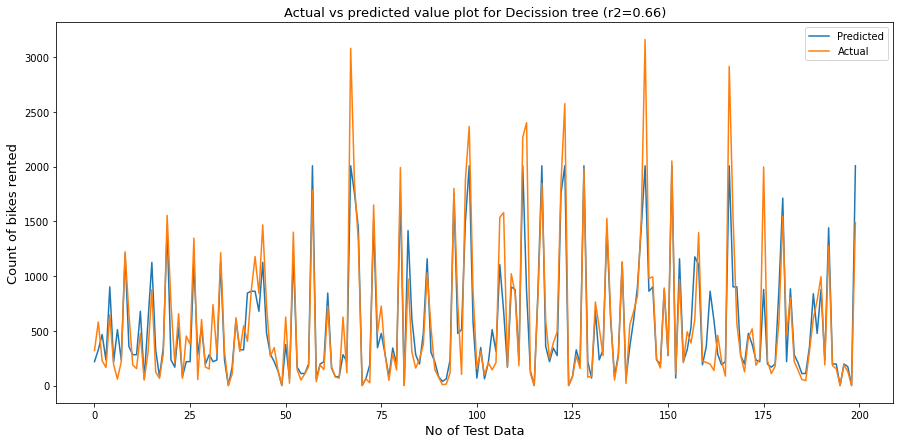

In [ ]:
#Plot the figure
plt.figure(figsize=(15,7))
plt.plot((np.array(y_pred_test_d)[:200])**2)
plt.plot(np.array((y_test)[:200])**2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=13,color='black')
plt.ylabel('Count of bikes rented',fontsize=13,color='black')
plt.title('Actual vs predicted value plot for Decission tree (r2=0.66)',fontsize=13,color='black')
plt.show()

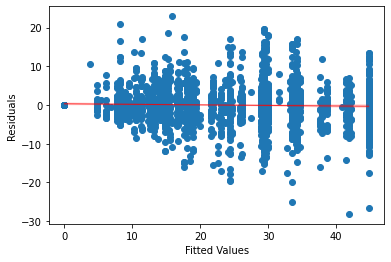

In [ ]:
# Heteroscadacity
plt.scatter(y_pred_test_d,y_test- y_pred_test_d)
sns.regplot((y_pred_test_d),(y_test)-(y_pred_test_d),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.991277196336428
MSE : 1.3432304571822027
RMSE : 1.1589781953005858
MAE : 0.7528160395273856
R2 : 0.991277196336428
Adjusted R2 : 0.9912129695262037


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 10.573593093605483
RMSE : 3.2517061819305697
MAE : 2.113661871081912
R2 : 0.9330642917120177
Adjusted R2 : 0.9325714379004173


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

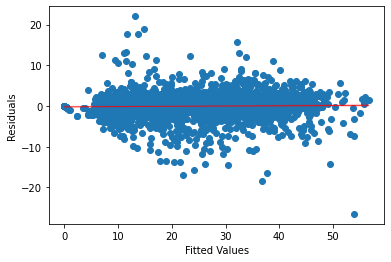

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
sns.regplot((y_pred_test_r),(y_test)-(y_pred_test_r),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

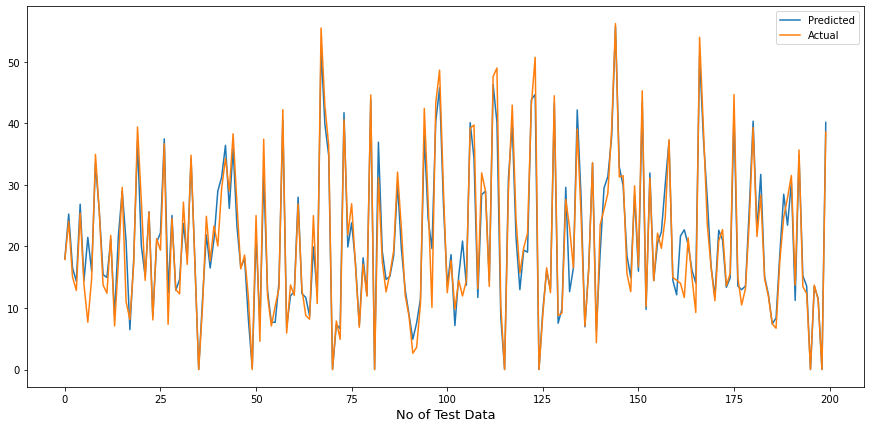

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(y_pred_test_r[:200])
plt.plot(np.array(y_test[:200]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=13,color='black')
plt.show()

# **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8985885211942781
MSE : 15.616422459284221
RMSE : 3.9517619436504803
MAE : 2.84352969616787
R2 : 0.8985885211942781
Adjusted R2 : 0.8978418190953865


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 17.850786090440966
RMSE : 4.225019063914501
MAE : 3.0125140597715627
R2 : 0.8869963124282196
Adjusted R2 : 0.8861642558239176


The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

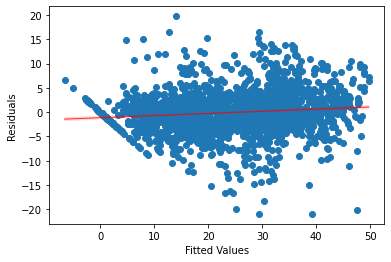

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
sns.regplot((y_pred_test_g),(y_test)-(y_pred_test_g),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#**Hyperparameter tuning** 

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

<b> Using GridSearchCV

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

### **Importing Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Predicting for training and testing set

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9630926016182249
MSE : 5.683395329507645
RMSE : 2.3839872754500275
MAE : 1.5963077840220858
R2 : 0.9630926016182249
Adjusted R2 : 0.9628208490300479


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 10.45953988404821
RMSE : 3.2341211919234274
MAE : 2.1183032971429343
R2 : 0.933786300994638
Adjusted R2 : 0.9332987634041705


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

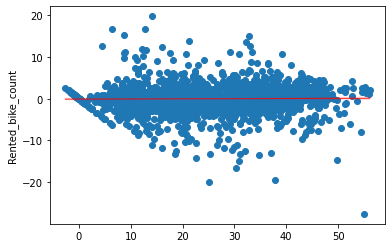

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))
sns.regplot((y_pred_g_g),(y_test)-(y_pred_g_g),scatter=False,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# **OBSERVATION**

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   5.633  53.521  7.316   
             1                Lasso regression   5.633  53.521  7.316   
             2          Elastic net regression   5.633  53.521  7.316   
             3        Decision tree regression   3.325  22.249  4.717   
             4        Random forest regression   0.753   1.343  1.159   
             5    Gradient boosting regression   2.844  15.616  3.952   
             6  Gradient Boosting gridsearchcv   1.596   5.683  2.384   
Test set     0               Linear regression   5.661  53.166  7.291   
             1                Lasso regression   5.661  53.166  7.291   
             2                Ridge regression   5.661  53.166  7.291   
             3           Elastic net regression  5.661  53.166  7.292   
             4        Decision tree regression   3.601  26.694  5.167   
             5        Random forest regression   2.114  10.574  3.252   
             6    Gradient boosting regression   3.013  17.851  4.225   
             7  Gradient Boosting gridsearchcv   2.118  10.460  3.234   

                R2_score  Adjusted R2  
Training set 0     0.652         0.65  
             1     0.652         0.65  
             2     0.652         0.65  
             3     0.856         0.85  
             4     0.991         0.99  
             5     0.899         0.90  
             6     0.963         0.96  
Test set     0     0.663         0.66  
             1     0.663         0.66  
             2     0.663         0.66  
             3     0.663         0.66  
             4     0.831         0.83  
             5     0.933         0.93  
             6     0.887         0.89  
             7     0.934         0.93

**• All the models have given almost similar r2 and adjusted r2 values for both training and testing sets ,clearing indicating there is no case of offerfitting seen in any model.**

**• Random forest Regressor (99% training set and 93% testing set) and Gradient Boosting gridsearchcv( 96% training and 93% testing) have given the highest R2 score.**

# **Model explainability using LIME**

In [ ]:
# installing lime package
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=6fe8d9b8035264299e75c9a66f50b62d1cbc0f0c32c72822c886ab71854305e2
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


## **Studying the feature importance using LIME on random forest regressor and Grid search gradient boosting models**

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
X.columns.values

array(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_radiation', 'Rainfall', 'Snowfall', 'Holiday',
       'Functioning_day', 'Winter', 'Spring', 'Summer', 'Autumn',
       'weekday', 'weekend'], dtype=object)

In [ ]:
#gridsearch gradient boosting model

lime_explainer = lime_tabular.LimeTabularExplainer(
    feature_names = X.columns.values,
    training_data = np.array(X_train),
    mode = 'regression',
    verbose=True,
    random_state =42 )
lime_exp = lime_explainer.explain_instance(
    data_row = X_test[4],
    predict_fn = gb_grid.best_estimator_.predict, 
)
lime_exp.show_in_notebook(show_table=True)


Intercept 9.87256324620645
Prediction_local [33.65185445]
Right: 26.165782231815722


In [ ]:
##random forest regressor model

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns.values,
    mode='regression')
exp = interpretor.explain_instance(
    data_row=X_test[50], ##new data
    predict_fn= rf_model.predict
)

exp.show_in_notebook(show_table=True)


**A random input test value is used for interpretability of feature importance for two models ,CV gradient boosting and Random forest regressor. All the features highlighted in orange has a positive impact on count of bike demand and features highlighted in blue has the negative impact for the sa**me.

## **Feature Importance**

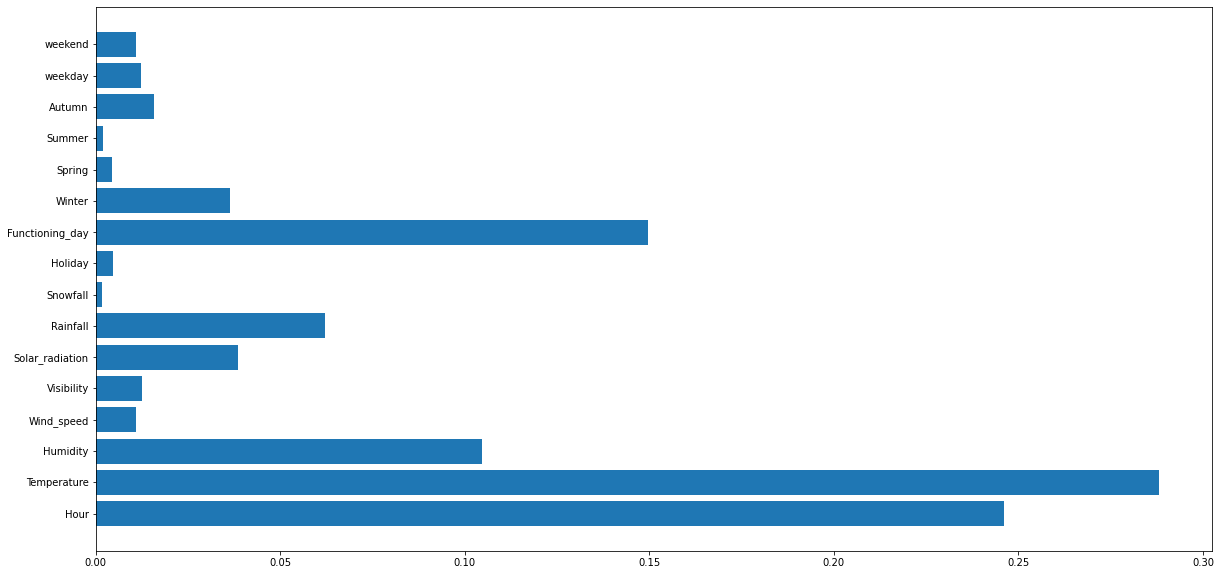

In [ ]:
from matplotlib import pyplot
plt.figure(figsize= (20,10))
pyplot.barh(X.columns,rf_model.feature_importances_)
plt.show()

**1. From the above bar plot we can clearly see that temperature and hour(time of the day) has the maximum affect on dependent varibale, followed by functioning day(wheter its working day or holiday) and humidity which is closely related to temperature.**

**2. All other feature does not seem to have much affect on dependent varibale.** 

#**CONCLUSION**

**EDA insights:**

1. There is very less or no demand of bikes on non-functioning days as compared with functioning days.

2. The demand for rented bikes is highest in the middle of the year or summer season , moderately high in spring and autumn seasons and lowest in winters.

3. There is no notable difference in total bike demand on weekdays and weekends.

4. Count of bikes is very less for low temperatures and increases as the temperature increases but we see a drop after it touches certain temperature which range between (27 -33)degree celsius.

5. Demand of bikes increases between 6 to 10 in morning on weekdays ,is constant uptill 3 and again increases from 4 in evening till 7 in evening and decreases constantly afterwards. On weekends bike demand constantly increases from 6 in morning and is at peak in evening.


**Results from ML models:**

1. Random Forest and grid search gradient boosting is the best performing model with an r2 score of 0.99 and 0.93 and r2 score of 0.96 and 0.93 for training and testing set respectively.

2. All other regression models (Linear Regression, Lasso Regression, Ridge Regression, Elastic net Regression)gave almost the same results having r2 score 0.65 and 0.66 for training and testing sets .

3. Random Forest Regression and grid search gradient boosting Models have been explained using LIME.

4. Temperature AND Hour are the most important features that affects the y variable the most followed by Functioning day and Humidity .

## **Project Summary**

The given data set contained data for one year and have 14 columns (10 numerical, 3 categorical and one date column).

Initially we started with loading the dataset, did data wrangling checked for duplicate values, nan values and treated the date column to extract the month.

Performed a hypothesis test to check wheter summer season has the highest avg bike count. Followed by analysing the dependent variable, 'Rented Bike Count' studying its relationship with independent variables like hour, temperature, working non working day etc. 

Plotted regression plots and Heat map to study the collinearity and multicollinearity, there was high collinearity between temperature and dew point temperature so dropped dew point temperature column along with month column.

In feature engineering we treated the categorical columns and one hot encoded them, followed by model training in which data was divided in train and testing set and was also standarzised.

Several models were trained and tested (Linear Regression,Lasso Regession,Ridge Regression, Elasticnet Regression,Decission tree, Random Forest and XGBoost )these models were implemented and  hyperparameter tuning was done to improve the model performance for Random Forest model as it gave the best results.

All the models have given almost similar r2 values for both training and testing sets ,clearing indicating there is no case of offerfitting seen in any model. 

Random forest Regressor and Gradient Boosting gridsearchcv have given the highest R2 score of 99% and 91%,  87% and 86% respectively for training Set and  testing set.

LIME was used for model explinability , 2 random instances from best performing models(Random Foest and Gradient boosting gridsearchcv) were and explained.
The 2 features that mostly affected the dependent variable were temperature and .